In [110]:
# Import libraries and needed classes

import sys
import os

import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, f1_score

from Code.LogisticRegression.logisticReg.logisticReg import LogisticRegression
from Code.utils.dataset import Dataset
import Code.utils.store_model as store_model
import numpy as np


In [111]:
# Set random seed to control randomness

np.random.seed(42)

In [112]:
# Read datasets

dataset = Dataset('../../Dataset/DatasetsGerados/dataset_training_input.csv',
                      '../../Dataset/DatasetsGerados/dataset_training_output.csv',
                      '../../Dataset/DatasetsGerados/dataset_validation_input.csv',
                      '../../Dataset/DatasetsGerados/dataset_validation_output.csv',
                      '../../Dataset/professor_inputs.csv',
                      '../../Dataset/professor_outputs.csv')

X_train, y_train, X_validation, y_validation, X_test, y_test, ids = dataset.get_datasets('Text', 'Label', sep='\t', rem_punctuation=False)

In [113]:

m_train = X_train.shape[0]
perm_train = np.random.permutation(m_train)
X_train_shuffled = X_train[perm_train]
y_train_shuffled = y_train[perm_train]

In [114]:
# Create model

n_features = X_train.shape[1]

model = LogisticRegression(n_features, reg_type="l2", reg_lambda=0.1)

In [115]:
# Train model
model.gradient_descent(X_train_shuffled, y_train_shuffled, X_validation, y_validation, alpha=0.1, iters=10)

0.6323200769186837 0.824
0.6323200769186837
0.5837127471513671 0.872
0.5440574965806231 0.904
0.5109862495734027 0.892
0.48288613611015174 0.911
0.4586035556682264 0.908
0.4373687298795853 0.918
0.4185858550719667 0.921
0.40181838454025615 0.924
0.3867142520238773 0.928


In [116]:
# Calculate model cost if y_test is available

if y_test is not None:
    print("Final cost:", model.cost_function(X_test, y_test))
    print("Accuracy:", accuracy_score(y_test, model.predict_many(X_test)))
    print("F1 Score:", f1_score(y_test, model.predict_many(X_test), average='macro'))

Final cost: 0.6191175762701342
Accuracy: 0.7333333333333333
F1 Score: 0.7333333333333333


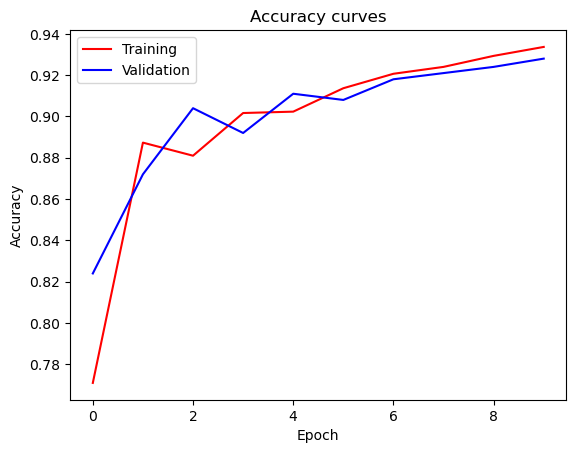

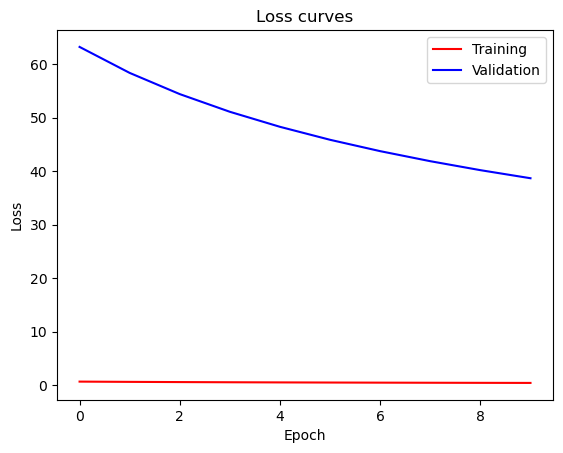

In [117]:
# Plot model

model.plot_train_curves()

In [118]:
# Test model

out = model.predict_many(X_test)
out = out.reshape(out.shape[0], 1)

In [119]:
# Store results
store_results = './Results/log_regression_results.csv'

# Ensure the directory exists
os.makedirs(os.path.dirname(store_results), exist_ok=True)

results = dataset.merge_results(ids, out)
results.to_csv(store_results, sep='\t', index=False)

In [120]:
# Store model
model_filepath = './Model/log_regression'
model_key = 'log_regression'

store_model.store_model(model_filepath, model_key, model)

In [121]:
# Retrieve model
model_filepath = './Model/log_regression'
model_key = 'log_regression'

model = store_model.retrieve_model(model_filepath, model_key)